# Tutorial 8
Clustering!

In [71]:
#load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

## Example 1a: Hierarchical clustering applied to synthetic data

In [2]:
#load data and check it out
meas = pd.read_csv('synth_data.csv',header=None) #meas = "measurements"
meas.head()

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


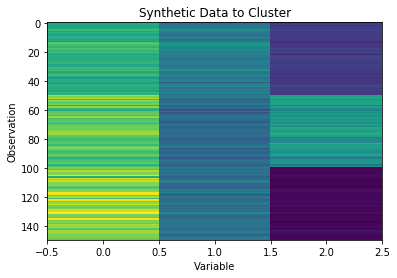

In [3]:
#visualize measurements

plt.imshow(meas,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Synthetic Data to Cluster')

plt.show()

Note that there are 150 observations, but it looks like there are roughly 3 different groups (1-50, 51-100, 101-150).  Our goal is to cluster these groups.

In [4]:
# we'll randomly shuffle the order of observations so that the clustering does not depend on the observation order
meas_shuffle = meas.sample(frac=1)

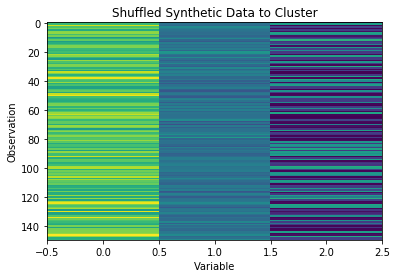

In [5]:
#visualize shuffled data

plt.imshow(meas_shuffle,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Shuffled Synthetic Data to Cluster')

plt.show()

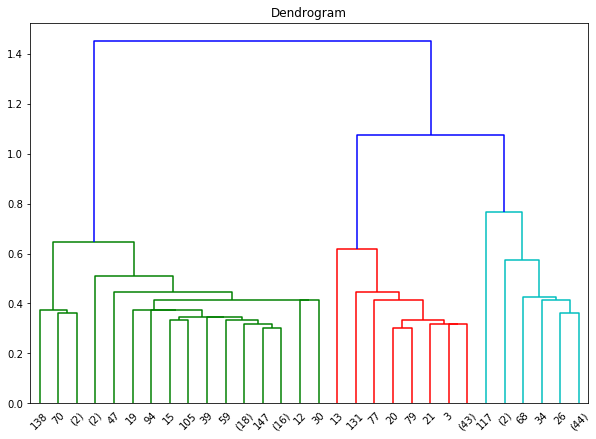

In [12]:
#make dendrogram to decide number of clusters to use
#used this blog post for code: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

data = np.copy(meas_shuffle)
linked = linkage(data,'single')
labelList = range(1, len(data))

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=30)
plt.title('Dendrogram')
plt.show()

In [13]:
#now cluster
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

#find mean pattern of each cluster
cluster_pattern = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern[cluster_num,:] = np.mean(data[inds,:],axis=0)
    
cluster_obs = np.empty((np.shape(data)))
for ind in range(len(data)):
    cluster_obs[ind] = cluster_pattern[cn[ind]]

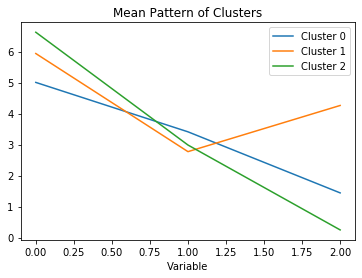

In [22]:
#visualize clusters

plt.plot(cluster_pattern.T)
plt.xlabel('Variable')
plt.title('Mean Pattern of Clusters')
plt.legend(['Cluster ' + str(ii) for ii in range(n_clusters)])
plt.show()

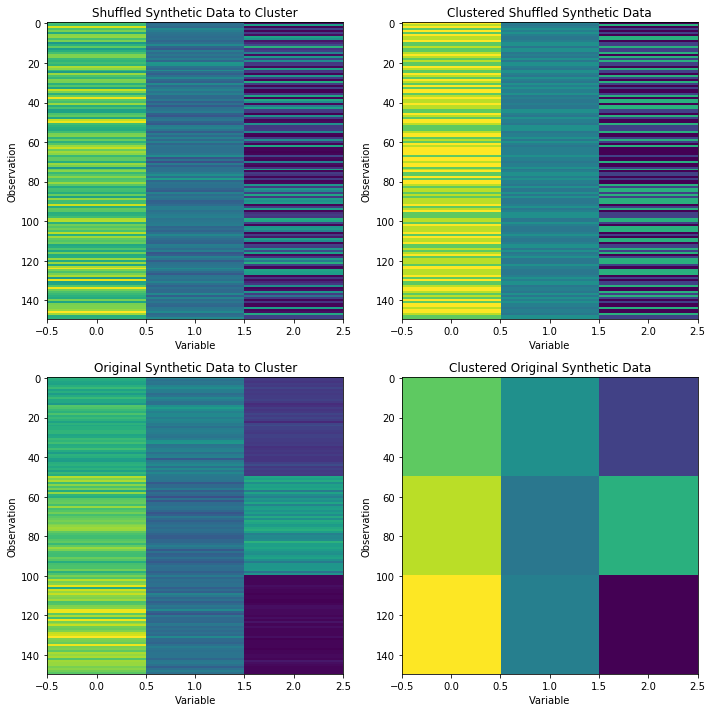

In [15]:
#visualize cluster results

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(meas_shuffle,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Shuffled Synthetic Data to Cluster')

plt.subplot(2,2,2)
plt.imshow(cluster_obs,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Clustered Shuffled Synthetic Data')

plt.subplot(2,2,3)
plt.imshow(meas,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Original Synthetic Data to Cluster')

cn_original = cluster.fit_predict(meas)
cluster_obs_original = np.empty((np.shape(data)))
for ind in range(len(data)):
    cluster_obs_original[ind] = cluster_pattern[cn_original[ind]]

plt.subplot(2,2,4)
plt.imshow(cluster_obs_original,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Clustered Original Synthetic Data')

plt.tight_layout()
plt.show()

## Example 1b: Same as 1a, but with k-means clustering

In [24]:
#use the same dendrogram as in 1a to choose the number of clusters

n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters).fit(data)
labels = kmeans.labels_

In [25]:
#find mean pattern of each cluster
cluster_pattern = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(labels==cluster_num)
    cluster_pattern[cluster_num,:] = np.mean(data[inds,:],axis=0)
    
cluster_obs = np.empty((np.shape(data)))
for ind in range(len(data)):
    cluster_obs[ind] = cluster_pattern[labels[ind]]

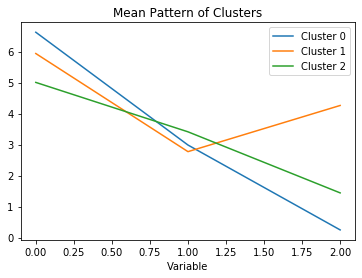

In [26]:
#visualize clusters

plt.plot(cluster_pattern.T)
plt.xlabel('Variable')
plt.title('Mean Pattern of Clusters')
plt.legend(['Cluster ' + str(ii) for ii in range(n_clusters)])
plt.show()

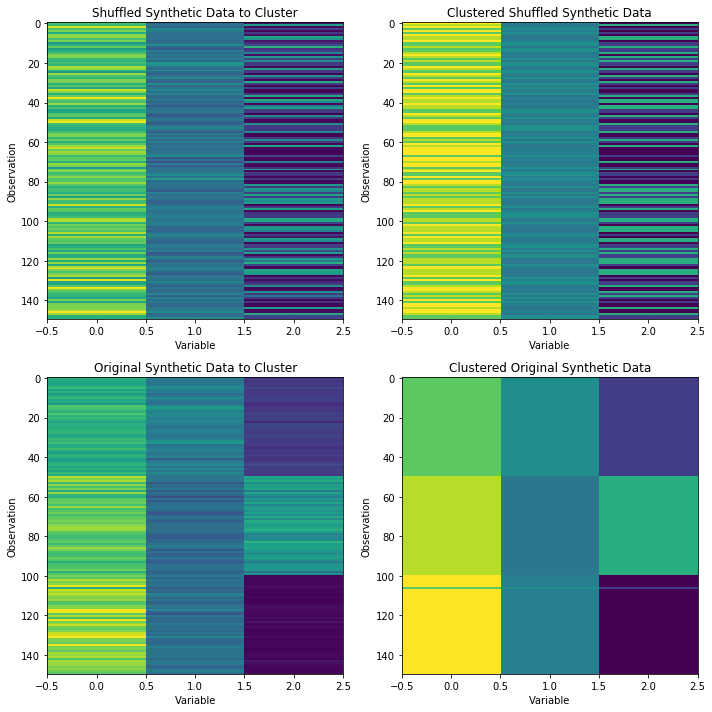

In [27]:
#visualize cluster results

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(meas_shuffle,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Shuffled Synthetic Data to Cluster')

plt.subplot(2,2,2)
plt.imshow(cluster_obs,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Clustered Shuffled Synthetic Data')

plt.subplot(2,2,3)
plt.imshow(meas,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Original Synthetic Data to Cluster')

labels_original = kmeans.fit_predict(meas)
cluster_obs_original = np.empty((np.shape(data)))
for ind in range(len(data)):
    cluster_obs_original[ind] = cluster_pattern[labels_original[ind]]

plt.subplot(2,2,4)
plt.imshow(cluster_obs_original,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Clustered Original Synthetic Data')

plt.tight_layout()
plt.show()

## Example 2: 
Heirarchical clustering to synthetic data in combination with PCA

In [52]:
#create the input data

k = 2*np.pi/100
omega = 2*np.pi/50
x = [float(kk) for kk in range(100)]
t = [float(kk) for kk in range(200)]
x = np.asarray(x).reshape(-1,1)
t = np.asarray(t).reshape(-1,1)

y = np.empty((len(t),len(x)))
for jj in range(200):
    y[jj] = [np.sin(k*xkk - omega*t[jj]) for xkk in x]
    
#sin pattern w/ amplitude of 1
y0 = y[0,:]

#cosine pattern w/ amplitude of 0.5
y1 = 0.5*y[37,:]

#step pattern w/ amplitude of 0.8
y2 = np.empty_like(y1)
y2[:50] = -0.8
y2[50:] = 0.8

#sawtooth pattern w/ amplitude of 1
y3 = np.empty_like(y2)
y3[:25] = np.squeeze(-2*x[:25]/25 + 1)
y3[25:50] = np.squeeze(2*x[25:50]/25 - 3)
y3[50:75] = np.squeeze(-2*x[50:75]/25 + 5)
y3[75:] = np.squeeze(2*x[75:]/25 - 7)


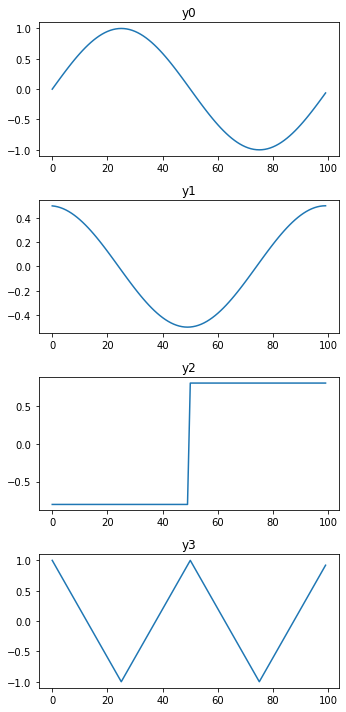

In [57]:
#visualize patterns in the data

plt.figure(figsize=(5,10))

plt.subplot(411)
plt.plot(y0)
plt.title('y0')

plt.subplot(412)
plt.plot(y1)
plt.title('y1')

plt.subplot(413)
plt.plot(y2)
plt.title('y2')

plt.subplot(414)
plt.plot(y3)
plt.title('y3')

plt.tight_layout()
plt.show()

In [62]:
#create timeseries where from t = 1:50 signal y0 occurs
ynew = np.empty((200,len(y0)))
ynew[:50] = y0

#then from t = 51:100 signal y1 occurs
ynew[50:100] = y1

#then from t = 101:150 signal y2 occurs
ynew[100:150] = y2

#then from t = 151:200 signal y3 occurs
ynew[150:] = y3

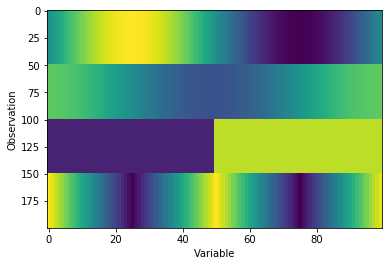

In [65]:
#visualize ynew
plt.imshow(ynew,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.show()

In [66]:
#add noise to ynew
noise = pd.read_csv('noise.csv',header=None)
ynew+=2*noise

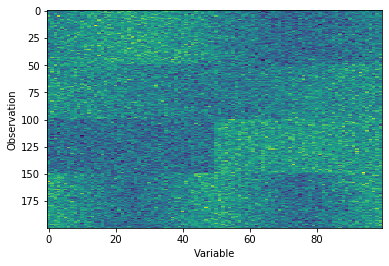

In [67]:
#visualize ynew with noise
plt.imshow(ynew,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.show()

In [72]:
#do PCA

data = ynew
n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

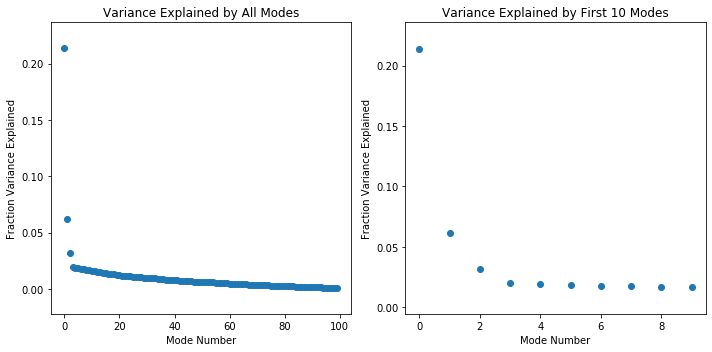

In [73]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

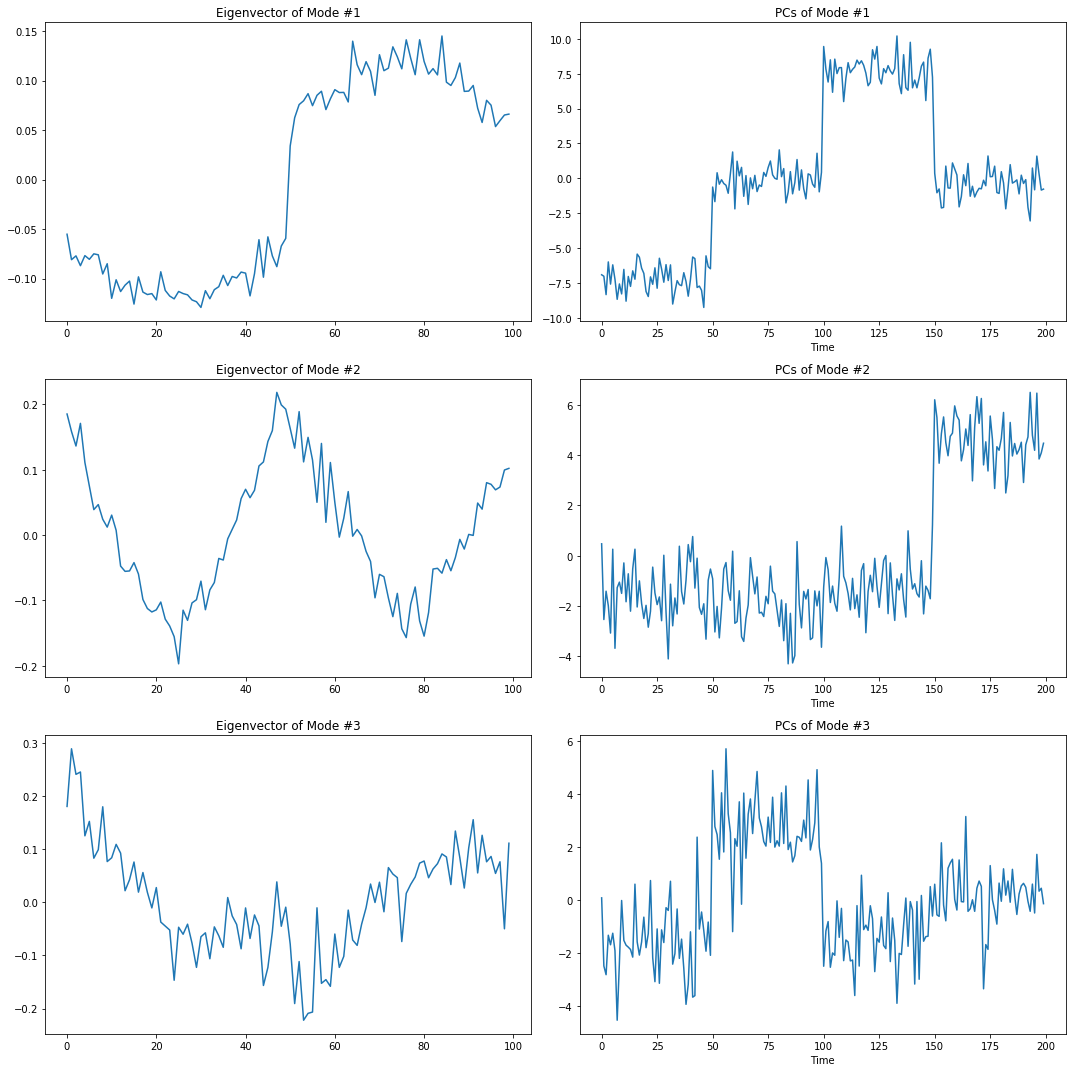

In [74]:
#plot the first n modes and PCs

n = 3 #looks like the first two modes explain pretty much everything!

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.tight_layout()

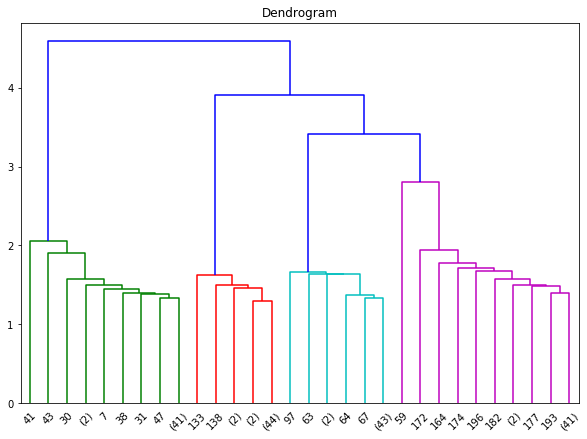

In [84]:
#perform clustering in the space of the first three PCs

data = PCs[:,:3]
linked = linkage(data)

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=30)
plt.title('Dendrogram')
plt.show()

In [109]:
#now cluster
n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

#find mean pattern of each cluster
cluster_pattern_PC = np.empty((n_clusters,np.shape(data)[1]))
cluster_pattern = np.empty((n_clusters,np.shape(ynew)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(data[inds,:],axis=0)
    cluster_pattern[cluster_num,:] = np.mean(ynew.T[np.squeeze(inds)],axis=1)

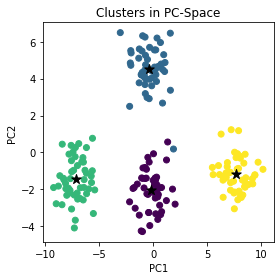

In [89]:
#visualized clustered data in PC-space

plt.figure(figsize=(4,4))

plt.subplot(111)
plt.scatter(PCs[:,0],PCs[:,1],c=cn)
plt.scatter(cluster_pattern_PC[:,0],cluster_pattern_PC[:,1],marker='*',c='k',s=100)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('Clusters in PC-Space')

plt.tight_layout()
plt.show()


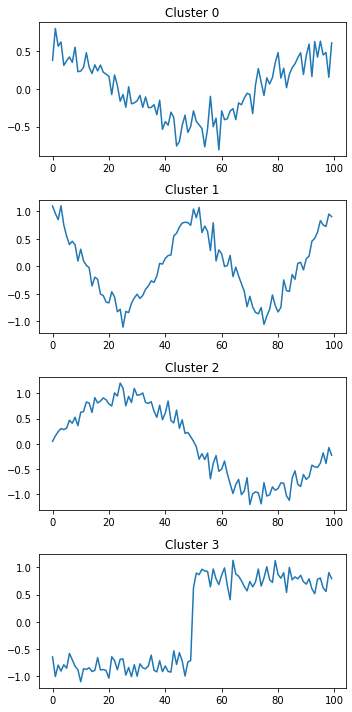

In [113]:
#visualize patterns of each cluster in original space

plt.figure(figsize=(5,10))

plt.subplot(411)
plt.plot(cluster_pattern[0])
plt.title('Cluster 0')

plt.subplot(412)
plt.plot(cluster_pattern[1])
plt.title('Cluster 1')

plt.subplot(413)
plt.plot(cluster_pattern[2])
plt.title('Cluster 2')

plt.subplot(414)
plt.plot(cluster_pattern[3])
plt.title('Cluster 3')

plt.tight_layout()
plt.show()

## Example 3
Clustering on real data.  We'll use the same data from Tutorial 4 (gridded monthly sea surface temperature data for Tropical Pacific from ERA Interim reanalysis).  

In [127]:
#load data
dataSST = pd.read_csv('SST_anomalies_data.csv',header=None)

In [128]:
#do PCA

n_modes = np.min(np.shape(dataSST))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(dataSST)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

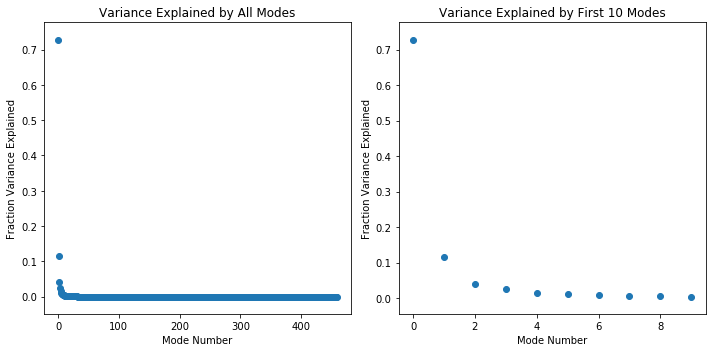

In [116]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

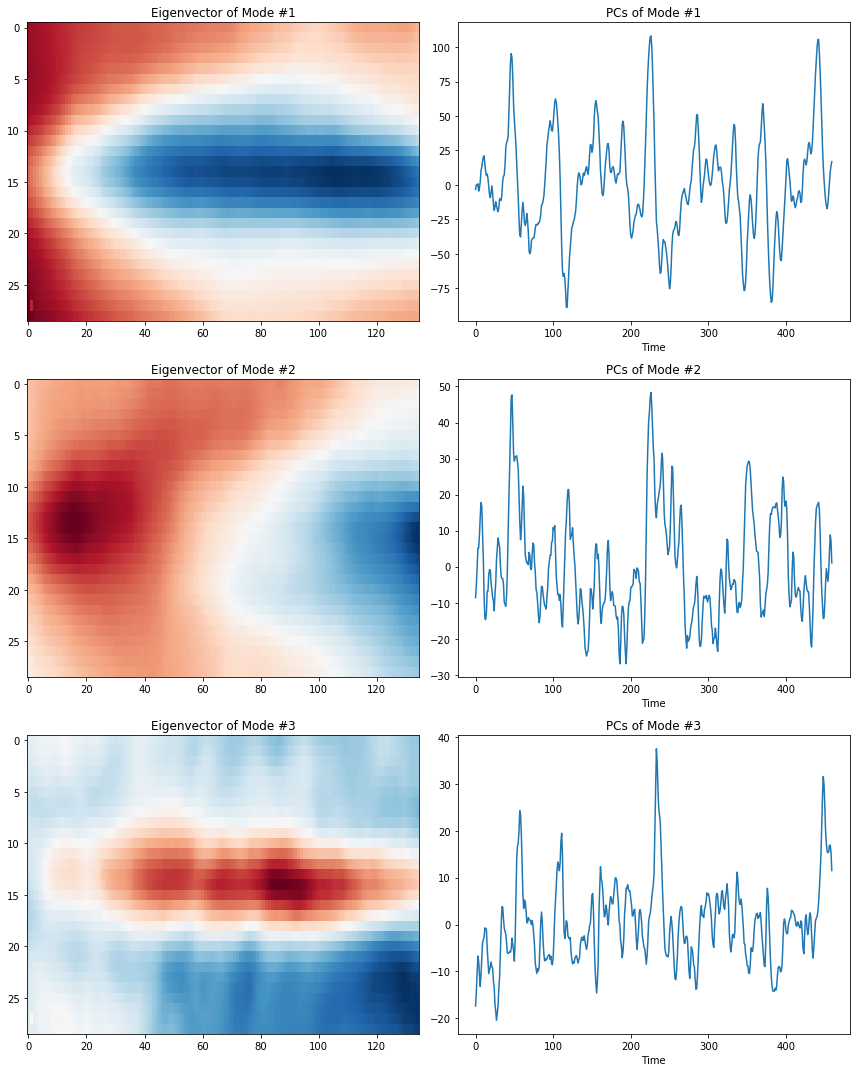

In [120]:
#plot the first n modes and PCs

n = 3 #looks like the first two modes explain pretty much everything!

plt.figure(figsize=(12,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(29,135)),aspect='auto',cmap='RdBu')
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.tight_layout()

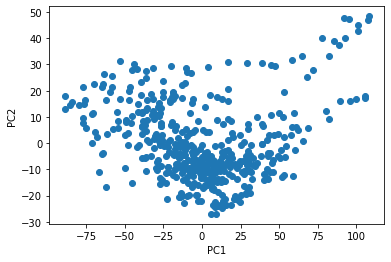

In [122]:
#plot data in space of first two eigenvectors
plt.scatter(PCs[:,0],PCs[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

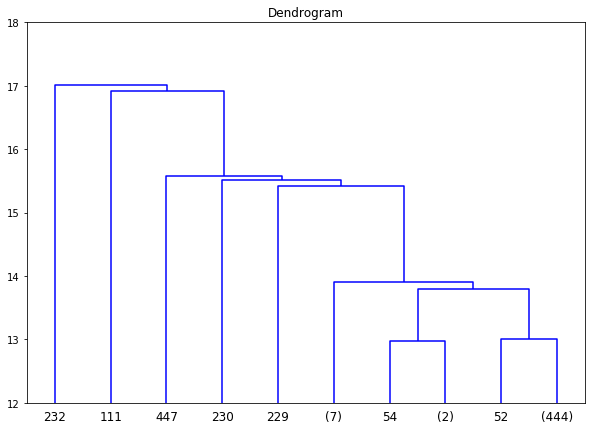

In [126]:
#clustering
data = PCs[:,:3]
linked = linkage(data)

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=10)
plt.title('Dendrogram')
plt.ylim((12,18))
plt.show()

In [135]:
#now cluster
n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

#find mean pattern of each cluster
cluster_pattern_PC = np.empty((n_clusters,np.shape(data)[1]))
cluster_pattern = np.empty((n_clusters,np.shape(dataSST)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(data[inds,:],axis=0)
    cluster_pattern[cluster_num,:] = np.mean(dataSST.iloc[np.squeeze(inds)],axis=0)

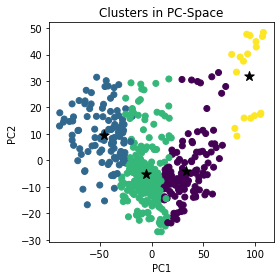

In [136]:
#visualized clustered data in PC-space

plt.figure(figsize=(4,4))

plt.subplot(111)
plt.scatter(PCs[:,0],PCs[:,1],c=cn)
plt.scatter(cluster_pattern_PC[:,0],cluster_pattern_PC[:,1],marker='*',c='k',s=100)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('Clusters in PC-Space')

plt.tight_layout()
plt.show()

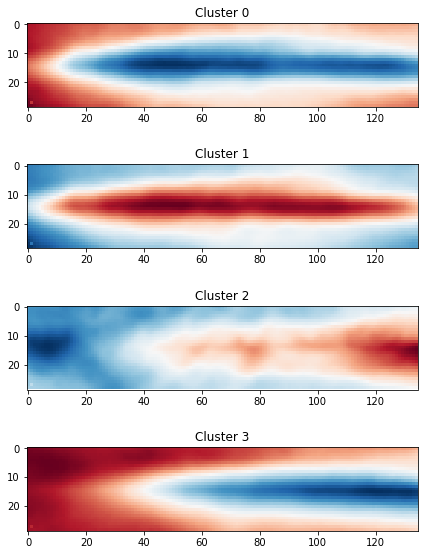

In [146]:
#visualize patterns of each cluster in original space

plt.figure(figsize=(6,8))

plt.subplot(411)
plt.imshow(np.reshape(cluster_pattern[0],(29,135)),cmap = 'RdBu')
plt.title('Cluster 0')

plt.subplot(412)
plt.imshow(np.reshape(cluster_pattern[1],(29,135)),cmap = 'RdBu')
plt.title('Cluster 1')

plt.subplot(413)
plt.imshow(np.reshape(cluster_pattern[2],(29,135)),cmap = 'RdBu')
plt.title('Cluster 2')

plt.subplot(414)
plt.imshow(np.reshape(cluster_pattern[3],(29,135)),cmap = 'RdBu')
plt.title('Cluster 3')

plt.tight_layout()
plt.show()